In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set a consistent style for plots
sns.set_style("whitegrid")

In [16]:
# --- 1. Data Loading ---
print("--- Data Loading ---")

# Load COVID clinical trials data
try:
    df_trials = pd.read_csv('COVID clinical trials.csv')
    print("Dataset 'COVID clinical trials.csv' loaded successfully.")
    print(f"Shape of clinical trials dataset: {df_trials.shape}")
except FileNotFoundError:
    print("Error: 'COVID clinical trials.csv' not found. Please ensure the file is in the correct directory.")
    exit()
# Load COVID epidemiological data
try:
    df_covid = pd.read_csv('covid_data.csv')
    print("Dataset 'covid_data.csv' loaded successfully.")
    print(f"Shape of epidemiological data dataset: {df_covid.shape}")
except FileNotFoundError:
    print("Error: 'covid_data.csv' not found. Please ensure the file is in the correct directory.")
    exit()
#print column names of both datasets
print("\nClinical Trials Dataset Columns:")
print(df_trials.columns.tolist())

print("\nEpidemiological Data Dataset Columns:")
print(df_covid.columns.tolist())


--- Data Loading ---
Dataset 'COVID clinical trials.csv' loaded successfully.
Shape of clinical trials dataset: (5783, 27)
Dataset 'covid_data.csv' loaded successfully.
Shape of epidemiological data dataset: (429435, 67)

Clinical Trials Dataset Columns:
['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Locations', 'Study Documents', 'URL']

Epidemiological Data Dataset Columns:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths

In [14]:
# --- 2. Initial Data Inspection for both datasets ---

print("\n--- Initial Data Inspection - Clinical Trials Data ---")
print("First 5 rows of df_trials:")
print(df_trials.head())
print("\nDataset Info for df_trials:")
df_trials.info()
print("\nMissing values before cleaning for df_trials:")
print(df_trials.isnull().sum())

print("\n--- Initial Data Inspection - Epidemiological Data ---")
print("First 5 rows of df_covid:")
print(df_covid.head())
print("\nDataset Info for df_covid:")
df_covid.info()
print("\nMissing values before cleaning for df_covid:")
print(df_covid.isnull().sum())


--- Initial Data Inspection - Clinical Trials Data ---
First 5 rows of df_trials:
   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                  

In [20]:

# --- 3. Data Cleaning and Preprocessing ---
print("\n--- Data Cleaning and Preprocessing ---")

# --- Preprocessing for df_trials (Clinical Trials Data) ---
# List of columns to check for missing values for analysis in df_trials
categorical_cols_trials = ['Status', 'Phase', 'Study Design', 'Intervention Type', 'Location', 'Sponsor/Collaborators']

for col in categorical_cols_trials:
    if col in df_trials.columns:
        df_trials[col] = df_trials[col].fillna('Unknown')
    else:
        print(f"Warning: Column '{col}' not found in 'df_trials'.")

# For 'Enrollment', which is numerical, fill with median or 0 if appropriate, or convert to 0 if NaN.
if 'Enrollment' in df_trials.columns:
    df_trials['Enrollment'] = pd.to_numeric(df_trials['Enrollment'], errors='coerce')
    df_trials['Enrollment'] = df_trials['Enrollment'].fillna(0).astype(int)
    print("Missing 'Enrollment' values handled in df_trials.")
else:
    print("Warning: Column 'Enrollment' not found in df_trials. Demographics insight might be limited.")

# Clean 'Phase' column: Combine similar phases if present (e.g., 'Phase 1/Phase 2' to 'Phase 1/2')
if 'Phase' in df_trials.columns:
    df_trials['Phase'] = df_trials['Phase'].replace({
        'Phase 1/Phase 2': 'Phase 1/2',
        'Phase 2/Phase 3': 'Phase 2/3',
        'Early Phase 1': 'Phase 1' # Group early phase 1 with phase 1
    })
    print("Phase column standardized in df_trials.")

print("\nMissing values after cleaning for df_trials (key columns):")
# Use the correct column names as in the DataFrame
correct_cols = ['Status', 'Phases', 'Study Designs', 'Interventions', 'Locations', 'Sponsor/Collaborators', 'Enrollment']
print(df_trials[correct_cols].isnull().sum())




--- Data Cleaning and Preprocessing ---
Missing 'Enrollment' values handled in df_trials.

Missing values after cleaning for df_trials (key columns):
Status                      0
Phases                   2461
Study Designs              35
Interventions             886
Locations                 585
Sponsor/Collaborators       0
Enrollment                  0
dtype: int64


In [25]:
# --- Preprocessing for df_covid (Epidemiological Data) ---
# Attempt to find the date column, prioritizing 'ObservationDate' then 'Date'
date_col_found = None
if 'ObservationDate' in df_covid.columns:
    df_covid['Date'] = pd.to_datetime(df_covid['ObservationDate'], errors='coerce')
    date_col_found = 'ObservationDate'
elif 'Date' in df_covid.columns:
    df_covid['Date'] = pd.to_datetime(df_covid['Date'], errors='coerce')
    date_col_found = 'Date'

if date_col_found:
    # Drop rows where 'Date' could not be parsed
    df_covid.dropna(subset=['Date'], inplace=True)
    df_covid.sort_values(by='Date', inplace=True)
    print(f"Date column '{date_col_found}' processed and sorted in df_covid.")
else:
    print("Warning: Neither 'Date' nor 'ObservationDate' column found in df_covid. Time-series analysis will be limited.")
# Fill numerical missing values with 0 (assuming cases/deaths/recoveries should be 0 if missing)
# Use actual column names present in df_covid
numerical_cols_covid = ['total_cases', 'total_deaths']
for col in numerical_cols_covid:
    if col in df_covid.columns:
        df_covid[col] = pd.to_numeric(df_covid[col], errors='coerce').fillna(0).astype(int)
    else:
        print(f"Warning: Column '{col}' not found in 'df_covid'.")

print("\nMissing values after cleaning for df_covid (key columns):")
print(df_covid[numerical_cols_covid].isnull().sum())




Missing values after cleaning for df_covid (key columns):
total_cases     0
total_deaths    0
dtype: int64



--- Exploratory Data Analysis (EDA) - Clinical Trials Data ---


C:\Users\Hi\AppData\Local\Temp\ipykernel_4976\2866796660.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')



Top 5 Trial Statuses:
Status
Recruiting                 2805
Completed                  1025
Not yet recruiting         1004
Active, not recruiting      526
Enrolling by invitation     181
Name: count, dtype: int64


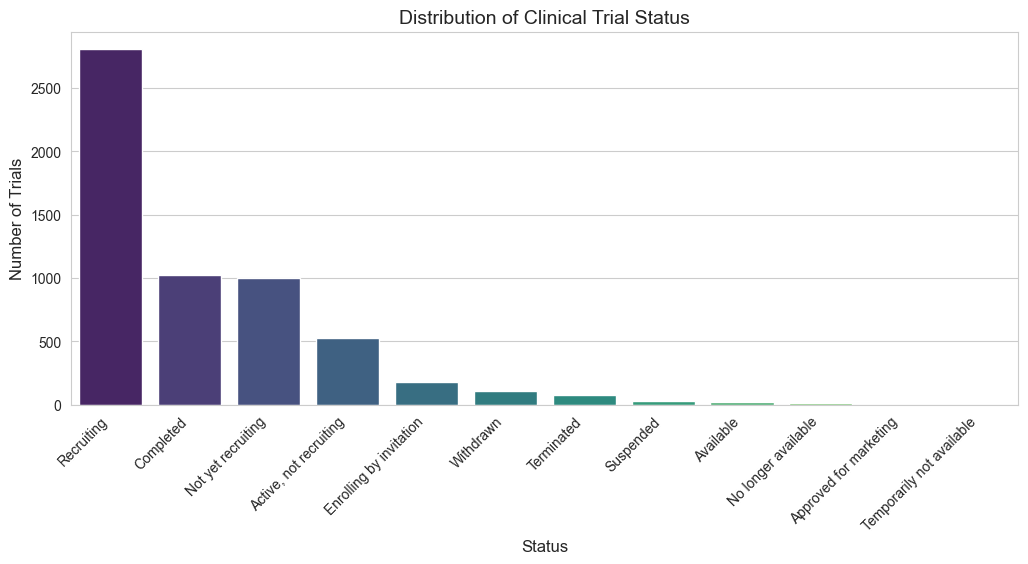

In [28]:
# --- 4. Exploratory Data Analysis (EDA) ---

# --- EDA for df_trials (Clinical Trials Data) ---
print("\n--- Exploratory Data Analysis (EDA) - Clinical Trials Data ---")
plt.figure(figsize=(20, 15)) # Larger figure for clinical trials plots

# 4.1. Distribution of Clinical Trial Status
try:
    if 'Status' in df_trials.columns:
        plt.subplot(3, 2, 1) # 3 rows, 2 columns, 1st plot
        status_counts = df_trials['Status'].value_counts()
        sns.barplot(x=status_counts.index, y=status_counts.values, palette='viridis')
        plt.title('Distribution of Clinical Trial Status', fontsize=14)
        plt.xlabel('Status', fontsize=12)
        plt.ylabel('Number of Trials', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        print("\nTop 5 Trial Statuses:")
        print(status_counts.head())
    else:
        print("Cannot plot 'Status' distribution for df_trials: Column not found.")
except Exception as e:
    print(f"Error during plotting clinical trial status: {e}")


C:\Users\Hi\AppData\Local\Temp\ipykernel_4976\3733010467.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=phase_counts.index, y=phase_counts.values, palette='cividis')



Distribution of Trial Phases:
Phases
Not Applicable    1354
Phase 0              0
Phase 1            472
Phase 1/2            0
Phase 2           1077
Phase 2/3            0
Phase 3            650
Phase 4            161
Unknown              0
Name: count, dtype: int64


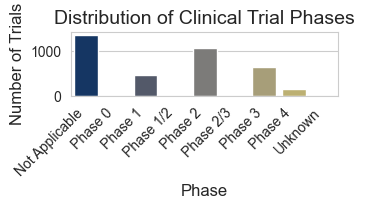

In [32]:
# 4.2. Distribution of Clinical Trial Phases
# Try both 'Phase' and 'Phases' columns for robustness
phase_col = None
if 'Phase' in df_trials.columns:
    phase_col = 'Phase'
elif 'Phases' in df_trials.columns:
    phase_col = 'Phases'

if phase_col:
    plt.subplot(3, 2, 2)
    # Split multiple phases if separated by '|' or ',' and count each phase
    all_phases = df_trials[phase_col].dropna().astype(str).str.split(r'\||,').explode().str.strip()
    # Standardize phase names
    all_phases = all_phases.replace({
        'Phase 1/Phase 2': 'Phase 1/2',
        'Phase 2/Phase 3': 'Phase 2/3',
        'Early Phase 1': 'Phase 1'
    })
    phase_order = ['Not Applicable', 'Phase 0', 'Phase 1', 'Phase 1/2', 'Phase 2', 'Phase 2/3', 'Phase 3', 'Phase 4', 'Unknown']
    phase_counts = all_phases.value_counts().reindex(phase_order, fill_value=0)
    sns.barplot(x=phase_counts.index, y=phase_counts.values, palette='cividis')
    plt.title('Distribution of Clinical Trial Phases', fontsize=14)
    plt.xlabel('Phase', fontsize=12)
    plt.ylabel('Number of Trials', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    print("\nDistribution of Trial Phases:")
    print(phase_counts)
else:
    print("Cannot plot 'Phase' distribution for df_trials: Neither 'Phase' nor 'Phases' column found.")


C:\Users\Hi\AppData\Local\Temp\ipykernel_4976\1138765338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=design_counts.index, y=design_counts.values, palette='magma')


C:\Users\Hi\AppData\Local\Temp\ipykernel_4976\1138765338.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()



Top 5 Study Designs:
Study Designs
Observational Model: Cohort|Time Perspective: Prospective                                                                                                                     1011
Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: None (Open Label)|Primary Purpose: Treatment                                                           572
Allocation: Randomized|Intervention Model: Parallel Assignment|Masking: Quadruple (Participant, Care Provider, Investigator, Outcomes Assessor)|Primary Purpose: Treatment     312
Observational Model: Cohort|Time Perspective: Retrospective                                                                                                                    282
Allocation: N/A|Intervention Model: Single Group Assignment|Masking: None (Open Label)|Primary Purpose: Treatment                                                              241
Name: count, dtype: int64


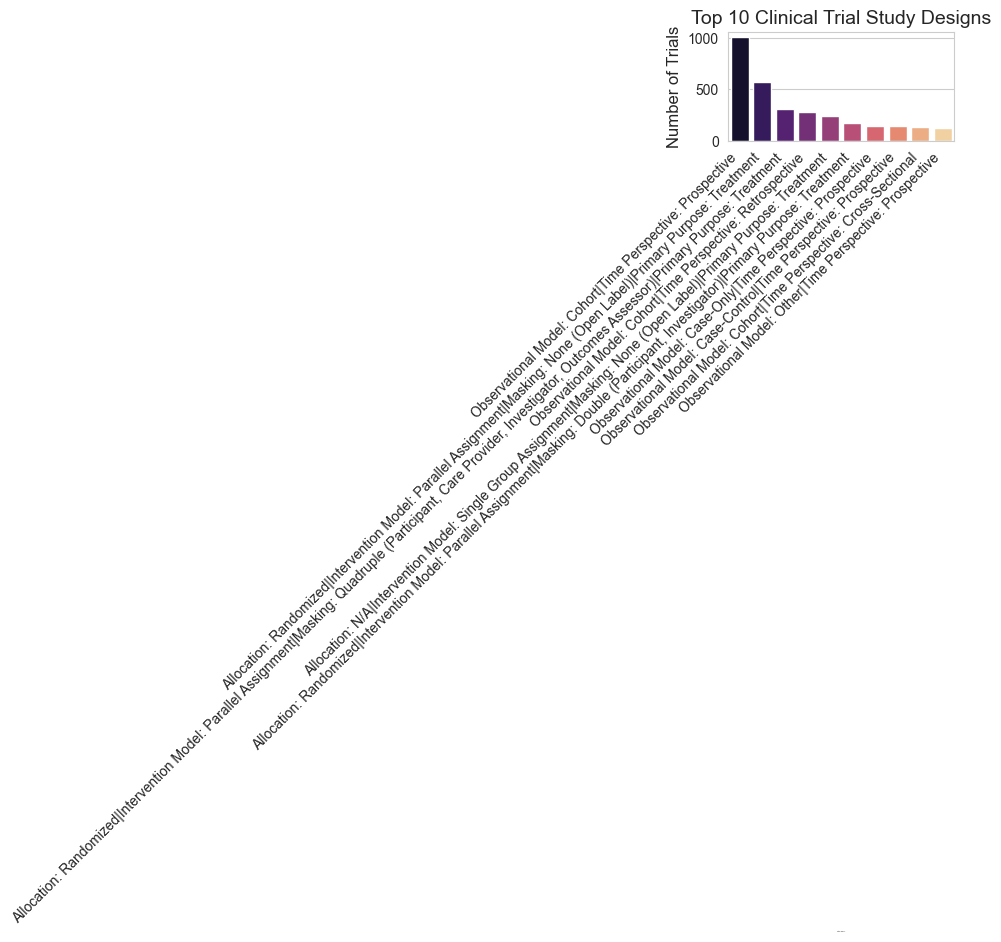

In [35]:
# 4.3. Distribution of Study Designs
if 'Study Designs' in df_trials.columns:
    plt.subplot(3, 2, 3)
    design_counts = df_trials['Study Designs'].value_counts().head(10)  # Top 10 designs
    sns.barplot(x=design_counts.index, y=design_counts.values, palette='magma')
    plt.title('Top 10 Clinical Trial Study Designs', fontsize=14)
    plt.xlabel('Study Design', fontsize=1)
    plt.ylabel('Number of Trials', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    print("\nTop 5 Study Designs:")
    print(design_counts.head())
else:
    print("Cannot plot 'Study Designs' distribution for df_trials: Column not found.")
